参考资料：

https://www.kaggle.com/uchidamasatoshi/lightgbm-to-predict-titanic-data

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

In [2]:
data_train = pd.read_csv('../input/train.csv')
data_test = pd.read_csv('../input/test.csv')

In [3]:
y = data_train['Survived']
ID = data_test['PassengerId']

In [4]:
data_train.drop(['PassengerId'], axis=1, inplace=True)
data_test.drop(['PassengerId'], axis=1, inplace=True)

In [5]:
del data_train['Name'], data_train['Ticket'], data_train['Cabin'], data_train['Survived']
del data_test['Name'], data_test['Ticket'], data_test['Cabin']

或者用 map 函数也是可以的。

In [6]:
data_train['Sex'].replace({'male': 0, 'female': 1}, inplace=True)
data_train['Embarked'].replace({'Q': 0, 'S': 1, 'C': 1}, inplace=True)

data_test['Sex'].replace({'male': 0, 'female': 1}, inplace=True)
data_test['Embarked'].replace({'Q': 0, 'S': 1, 'C': 1}, inplace=True)

In [7]:
# Check null data
data_train[data_train['Pclass'].isnull()]
data_train[data_train['Sex'].isnull()]
data_train[data_train['Age'].isnull()]
data_train[data_train['SibSp'].isnull()]
data_train[data_train['Parch'].isnull()]
data_train[data_train['Fare'].isnull()]
data_train[data_train['Embarked'].isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,38.0,0,0,80.0,NaN
829,1,1,62.0,0,0,80.0,NaN


In [8]:
data_test[data_test['Pclass'].isnull()]
data_test[data_test['Sex'].isnull()]
data_test[data_test['Age'].isnull()]
data_test[data_test['SibSp'].isnull()]
data_test[data_test['Parch'].isnull()]
data_test[data_test['Fare'].isnull()]
data_test[data_test['Embarked'].isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [9]:
X = data_train

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=666)

In [11]:
X_train.shape, X_test.shape

((712, 7), (179, 7))

In [12]:
y_train.shape,y_test.shape

((712,), (179,))

In [13]:
import lightgbm as lgb

# generate dataset
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [14]:
# LightGBM Hyper Parameter
lgbm_params = {
    'objective': 'binary',
    'metric': 'auc',
}

In [15]:
%%time
# train model
model = lgb.train(lgbm_params, lgb_train, valid_sets=lgb_eval)

[1]	valid_0's auc: 0.832045
[2]	valid_0's auc: 0.829882
[3]	valid_0's auc: 0.827851
[4]	valid_0's auc: 0.830013
[5]	valid_0's auc: 0.826999
[6]	valid_0's auc: 0.826671
[7]	valid_0's auc: 0.832176
[8]	valid_0's auc: 0.832765
[9]	valid_0's auc: 0.833421
[10]	valid_0's auc: 0.829751
[11]	valid_0's auc: 0.829423
[12]	valid_0's auc: 0.827785
[13]	valid_0's auc: 0.830144
[14]	valid_0's auc: 0.82962
[15]	valid_0's auc: 0.829161
[16]	valid_0's auc: 0.828506
[17]	valid_0's auc: 0.824705
[18]	valid_0's auc: 0.824312
[19]	valid_0's auc: 0.82772
[20]	valid_0's auc: 0.830079
[21]	valid_0's auc: 0.826868
[22]	valid_0's auc: 0.830144
[23]	valid_0's auc: 0.828702
[24]	valid_0's auc: 0.826474
[25]	valid_0's auc: 0.828834
[26]	valid_0's auc: 0.830537
[27]	valid_0's auc: 0.827654
[28]	valid_0's auc: 0.831455
[29]	valid_0's auc: 0.834862
[30]	valid_0's auc: 0.835714
[31]	valid_0's auc: 0.837025
[32]	valid_0's auc: 0.836894
[33]	valid_0's auc: 0.84017
[34]	valid_0's auc: 0.84135
[35]	valid_0's auc: 0.84121

In [16]:
# predict X_test data
y_pred = model.predict(X_test, num_iteration=model.best_iteration)

In [17]:
from sklearn.metrics import roc_curve

# AUC (Area Under the Curve)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [18]:
fpr

array([0.        , 0.        , 0.        , 0.00917431, 0.00917431,
       0.00917431, 0.00917431, 0.01834862, 0.01834862, 0.02752294,
       0.02752294, 0.03669725, 0.03669725, 0.04587156, 0.04587156,
       0.05504587, 0.05504587, 0.0733945 , 0.0733945 , 0.09174312,
       0.09174312, 0.11926606, 0.11926606, 0.14678899, 0.14678899,
       0.20183486, 0.20183486, 0.2293578 , 0.2293578 , 0.23853211,
       0.23853211, 0.24770642, 0.24770642, 0.30275229, 0.30275229,
       0.40366972, 0.42201835, 0.49541284, 0.49541284, 0.52293578,
       0.55045872, 0.65137615, 0.65137615, 0.69724771, 0.70642202,
       0.74311927, 0.7706422 , 0.7706422 , 0.77981651, 0.79816514,
       0.81651376, 0.83486239, 0.83486239, 0.85321101, 0.85321101,
       0.88073394, 0.88073394, 0.89908257, 0.89908257, 0.9266055 ,
       0.94495413, 0.97247706, 0.97247706, 1.        ])

In [19]:
tpr

array([0.        , 0.01428571, 0.05714286, 0.05714286, 0.15714286,
       0.18571429, 0.35714286, 0.35714286, 0.38571429, 0.38571429,
       0.42857143, 0.42857143, 0.47142857, 0.47142857, 0.65714286,
       0.65714286, 0.67142857, 0.67142857, 0.68571429, 0.68571429,
       0.72857143, 0.72857143, 0.74285714, 0.74285714, 0.75714286,
       0.75714286, 0.78571429, 0.78571429, 0.8       , 0.8       ,
       0.81428571, 0.81428571, 0.82857143, 0.82857143, 0.84285714,
       0.84285714, 0.84285714, 0.84285714, 0.88571429, 0.88571429,
       0.88571429, 0.88571429, 0.9       , 0.9       , 0.91428571,
       0.91428571, 0.91428571, 0.92857143, 0.92857143, 0.92857143,
       0.92857143, 0.92857143, 0.94285714, 0.94285714, 0.95714286,
       0.95714286, 0.97142857, 0.97142857, 0.98571429, 0.98571429,
       0.98571429, 0.98571429, 1.        , 1.        ])

In [20]:
thresholds

array([1.99943121e+00, 9.99431206e-01, 9.98478791e-01, 9.97311050e-01,
       9.93613773e-01, 9.92881586e-01, 9.84422317e-01, 9.84073719e-01,
       9.79172115e-01, 9.78540840e-01, 9.64436553e-01, 9.60588113e-01,
       9.23992958e-01, 9.17371171e-01, 7.50037141e-01, 7.33375585e-01,
       7.16695508e-01, 6.59710121e-01, 6.42022315e-01, 5.72607613e-01,
       4.93698931e-01, 4.81974381e-01, 4.69583395e-01, 4.49419427e-01,
       4.47750930e-01, 3.56789326e-01, 3.35150742e-01, 2.79238385e-01,
       2.76088713e-01, 2.75503816e-01, 2.59746582e-01, 2.52003973e-01,
       2.40369031e-01, 1.82053151e-01, 1.72978109e-01, 1.28736995e-01,
       1.19669382e-01, 9.52344957e-02, 8.77714396e-02, 7.40842395e-02,
       6.85216581e-02, 3.61659389e-02, 3.51097469e-02, 3.00599867e-02,
       2.95029382e-02, 2.37300501e-02, 2.02119796e-02, 2.01115008e-02,
       1.99149544e-02, 1.96709403e-02, 1.89547952e-02, 1.86495787e-02,
       1.81351871e-02, 1.25376227e-02, 1.21131975e-02, 1.18834393e-02,
      

In [21]:
from sklearn.metrics import auc

auc(fpr, tpr)

0.8405635648754913

In [22]:
y_test_pred = model.predict(data_test, num_iteration=model.best_iteration)

In [23]:
preds = np.round(y_test_pred).astype(int)
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [24]:
res = pd.DataFrame({'PassengerId': ID, 'Survived': preds})
res.to_csv("../output/LightGBM-submit.csv", index=False)

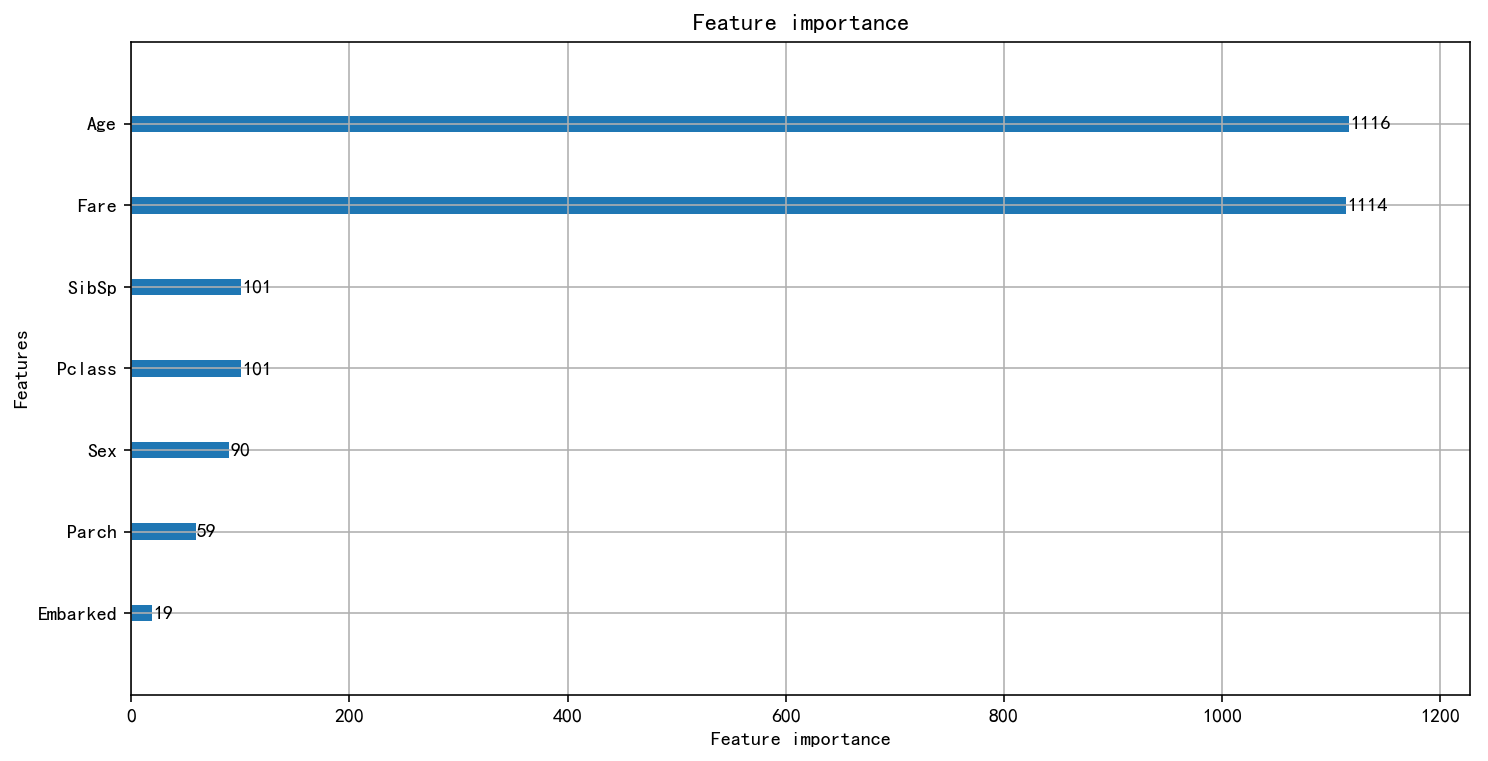

In [25]:
# Plot Feature Importance
lgb.plot_importance(model, figsize=(12, 6))
plt.show()

In [26]:
from xgboost import XGBClassifier
xgbc = XGBClassifier()

xgbc.fit(X, y)
y_pred = xgbc.predict(data_test)

In [27]:
res = pd.DataFrame({
    'PassengerId': ID,
    'Survived': y_pred
})
res.to_csv("../output/xgbc.csv", index=False)